<a href="https://colab.research.google.com/github/gabrielvieiraf/ProjetosPython/blob/master/GoogleColab/MachineLearning/ML_N_Supervisionada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Indrodução Machine Learning Não Supervisionada 01**

## Tratando Dados

In [12]:
import pandas as pd

# Importando dados
dados = pd.read_html('https://github.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/blob/master/movies.csv')
filmes = dados[0]

# Deletando coluna
del filmes['Unnamed: 0']

# Visualizando dados
filmes.head()

# Traduzindo Colunas
colunas = {
    'movieId':'Id',
    'title':'titulo',
    'genres':'generos'
}

# Traduzindo Gêneros
generos_colunas = {
    'Adventure':'Aventura',
    'Action':'Ação',
    'Film-Noir':'Noir',
    '(no genres listed)':'sem gênero',
    'Mystery':'Mistério',
    'War':'Guerra',
    'Western':'Ocidental',
    'Animation':'Animação',
    'Horror':'Terror',
    'Documentary':'Documentário',
    'Comedy' : 'Comédia',
    'Fantasy' : 'Fantasia',
    'Thriller' : 'Suspense',
    'Children' : 'Infantil', 
}

# Renomeando Colunas
filmes.rename(columns = colunas, inplace = True )

# Separando Gêneros por colunas
generos = filmes['generos'].str.get_dummies()

# Renomeando Gêneros
generos.rename(columns = generos_colunas, inplace = True )

# Visualizando Dados
generos.head()

# Deletando Coluna
del filmes['generos']

# Concatenando Dataframes
dados_filmes = pd.concat([filmes,generos], axis = 1)

# Visualizando dados
dados_filmes.head()


,Id,titulo,sem gênero,Ação,Aventura,Animação,Infantil,Comédia,Crime,Documentário,Drama,Fantasia,Noir,Terror,IMAX,Musical,Mistério,Romance,Sci-Fi,Suspense,Guerra,Ocidental
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reescalando gêneros
generos_escalados = scaler.fit_transform(generos)

# Visualizando Gêneros Escalados
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

## Agrupando Filmes por Gêneros

### Verificando Número de Grupos

In [14]:
def kmeans(numero_clusters,generos):
  modelo = KMeans(n_clusters =  numero_clusters)
  modelo.fit(generos)
  return (numero_clusters,modelo.inertia_)

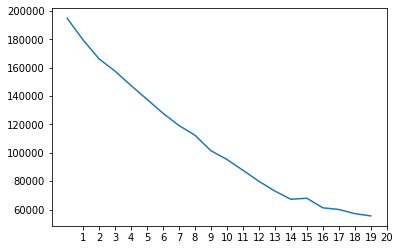

In [15]:
resultado = [kmeans(i, generos_escalados) for i in range(1,21)]

resultado = pd.DataFrame(resultado,
             columns=['n_clusters','inertia'])

resultado.inertia.plot(xticks=resultado.n_clusters)

### Agrupando

In [16]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=14)

# Ensinando Robô
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

# Criando Dataframe para grupos
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)

Grupos [5 5 0 ... 6 2 7]


## Visualizando Grupos


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd187370860>,
      dtype=object)

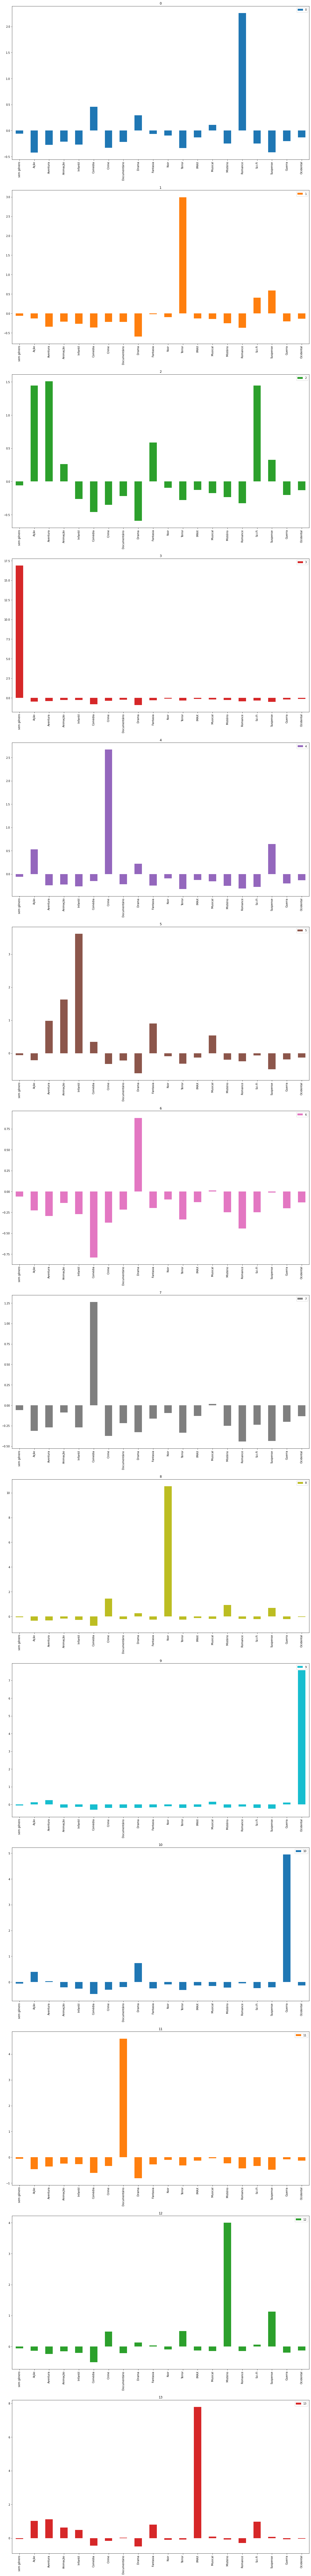

In [17]:
grupos.transpose().plot.bar(subplots=True,
                sharex = False,
                figsize=(20,176))

### Buscando Filmes nos grupos

In [18]:
grupo = 2
filtro = modelo.labels_ ==  grupo
dados_filmes[filtro].head(50)

,Id,titulo,sem gênero,Ação,Aventura,Animação,Infantil,Comédia,Crime,Documentário,Drama,Fantasia,Noir,Terror,IMAX,Musical,Mistério,Romance,Sci-Fi,Suspense,Guerra,Ocidental
9,10,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14,15,Cutthroat Island (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
40,44,Mortal Kombat (1995),0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
59,66,Lawnmower Man 2: Beyond Cyberspace (1996),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
68,76,Screamers (1995),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
77,86,White Squall (1996),0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
80,89,Nick of Time (1995),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
84,95,Broken Arrow (1996),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
133,160,Congo (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
144,172,Johnny Mnemonic (1995),0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0


## Visualizando TSNE no Scatter Plot

In [19]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE()

visualizacao = tsne.fit_transform(generos_escalados)

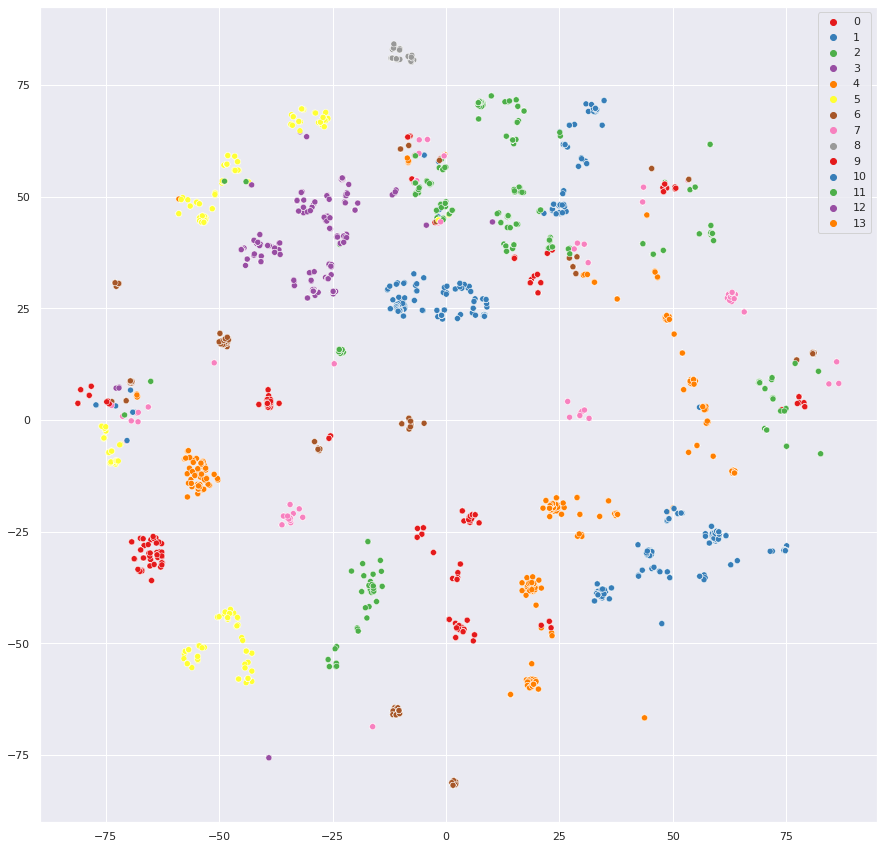

In [20]:
sns.set( rc= {'figure.figsize':(15,15)})
sns.scatterplot(x= visualizacao[:,0], 
                y= visualizacao[:,1],
                hue = modelo.labels_,
                palette = sns.color_palette('Set1', 14))

# Agrupamento Hierárquico

In [24]:
from sklearn.cluster import AgglomerativeClustering

modelo =  AgglomerativeClustering(n_clusters = 14)

grupos = modelo.fit_predict(generos_escalados)
grupos


array([ 5,  0, 13, ...,  2,  5,  2])

In [25]:
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-15.136043 , -21.286728 ],
       [ -4.6726727, -48.6114   ],
       [  8.374165 ,  42.14045  ],
       ...,
       [  0.6929796,  18.74311  ],
       [-10.222722 ,  49.49686  ],
       [ 13.563391 , -17.751383 ]], dtype=float32)

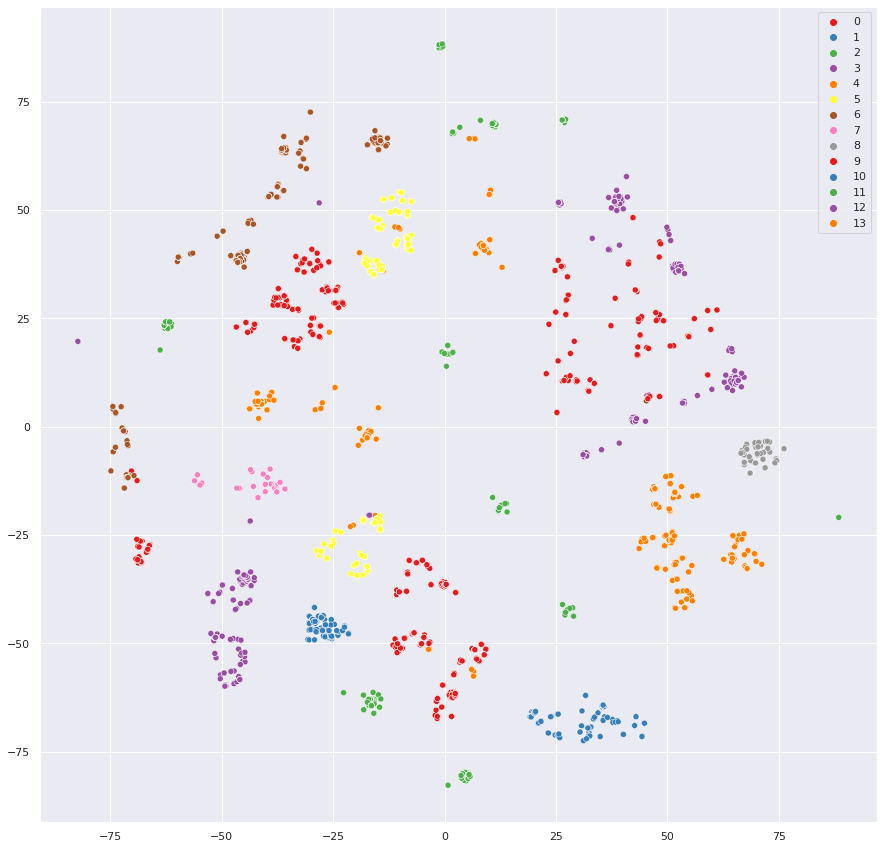

In [27]:
sns.scatterplot(x=visualizacao[:,0],
                y=visualizacao[:,1],
                hue=grupos,
                palette = sns.color_palette('Set1', 14))

## Dendrograma

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Agrupando Novamente

In [29]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=14)

# Ensinando Robô
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

# Criando Dataframe para grupos
grupos = pd.DataFrame(modelo.cluster_centers_,
             columns = generos.columns)

Grupos [10  2  1 ...  3 10  7]


### Plotando Dendrograma

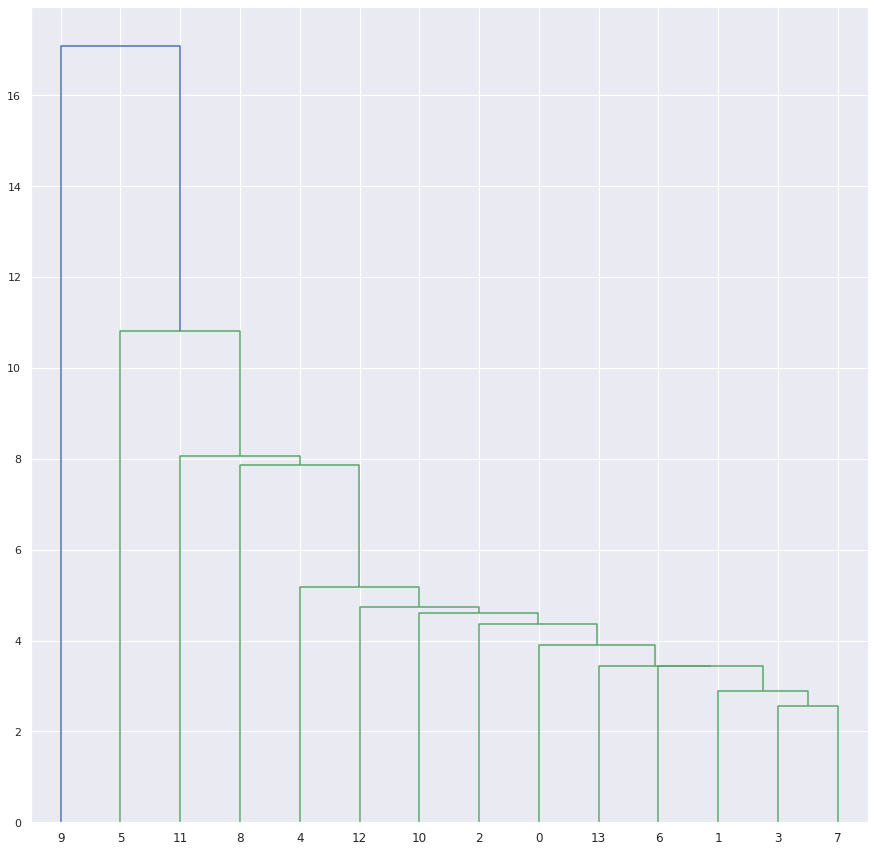

In [30]:
# Matriz de instância
matriz = linkage(grupos)

dendrograma = dendrogram(matriz)